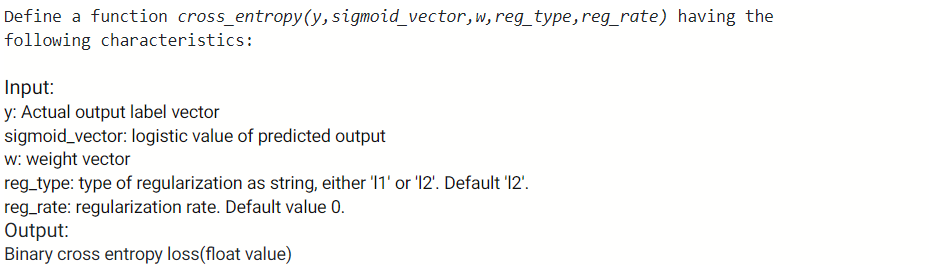

In [1]:
import numpy as np
def cross_entropy(y,sigmoid_vector,w,reg_type='l2',reg_rate=0):
	loss_orig = -1 * np.sum(y * np.log(sigmoid_vector) + (1 - y) * np.log(1 - sigmoid_vector))
	if reg_type == "l2":
		reg = reg_rate * np.dot(w.T, w)
	else:
		reg = reg_rate * np.sum(abs(w))
	return loss_orig + reg

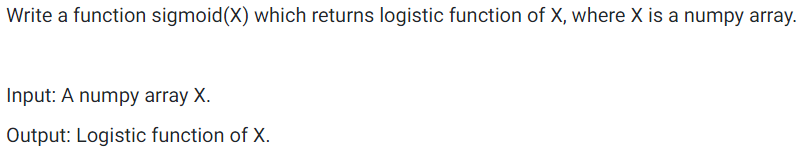

In [2]:
import numpy as np
def sigmoid(X):
    sig = 1/(1+np.exp(-X))
    return sig

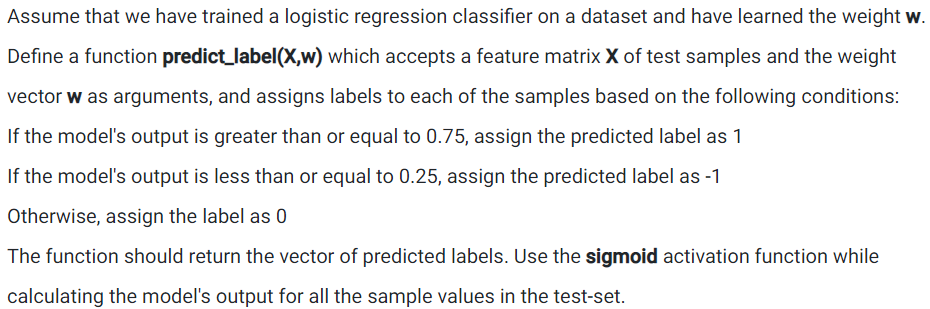

In [3]:
import numpy as np
def linear_combination(X, w):
    return X @ w
	
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
	
def activation(X, w):
    return sigmoid(linear_combination(X, w))
	
def predict_label(X, w):
    labels = np.where(activation(X, w) >= 0.75, 1, np.where(activation(X, w) <= 0.25, -1, 0))
    return labels

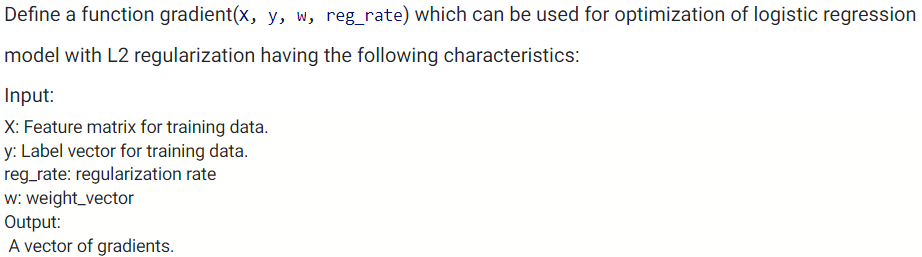

In [4]:
import numpy as np
def gradient(X,y,w,reg_rate):
    sigmoid_vector = 1 / (1 + np.exp(-X@w))
    G = X.T @ (sigmoid_vector - y) + reg_rate * w
    return G

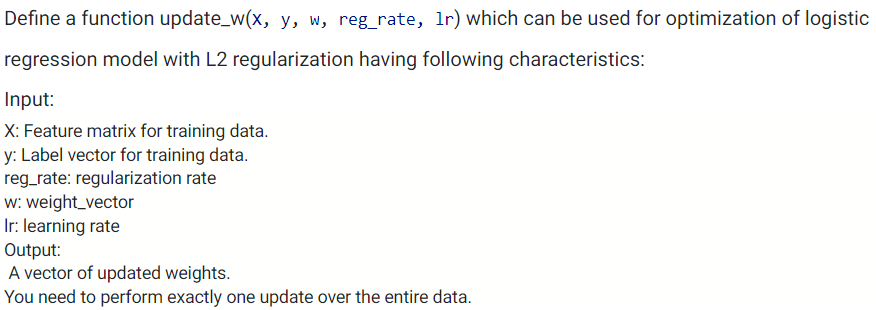

In [5]:
import numpy as np
def calculate_gradient(X, y, w, reg_rate):
    sigmoid_vector = 1 / (1 + np.exp(-X@w))
    return X.T @ (sigmoid_vector - y) + reg_rate * w
	
def update_w(X, y, w, reg_rate, lr):
    return w - calculate_gradient(X, y, w, reg_rate) * lr

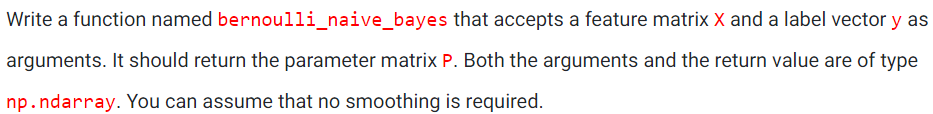

In [6]:
import numpy as np
def bernoulli_naive_bayes(X, y):
    _classes = np.unique(y)
    n_classes = len(np.unique(y))
    n_samples, n_features = X.shape
    p = np.zeros((n_classes, n_features))
    
    for c in _classes:
        X_c = X[y == c]
        p[c-1, : ] = (np.sum(X_c, axis=0))/(X_c.shape[0])
        
    
    return p.T

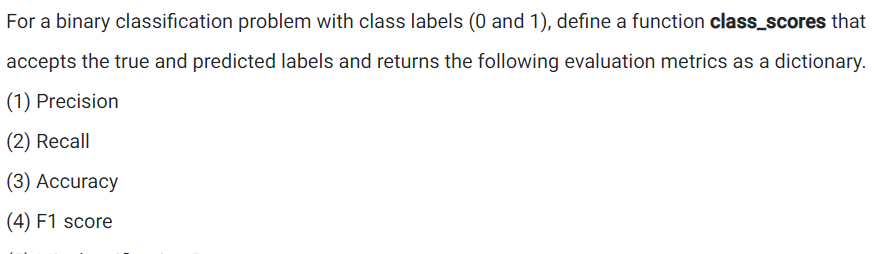

In [7]:
import numpy as np
def class_scores (y_test, y_pred) :
    tp = np.where((y_test == 1) & (y_pred == 1), 1, 0).sum()
    tn = np.where((y_test == 0) & (y_pred == 0), 1, 0).sum()
    fp = np.where((y_test == 0) & (y_pred == 1), 1, 0).sum()
    fn = np.where((y_test == 1) & (y_pred == 0), 1, 0).sum()
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    f1_score = 2 * ((precision * recall) / (precision + recall))
    misclassification_rate = 1 - accuracy
    return {"precision": precision, "recall": recall, "accuracy": accuracy,
           "f1_score": f1_score, "misclassification_rate": misclassification_rate}